In [1]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import scipy
import time
from math import comb
from scipy.stats import poisson
from scipy.stats import zipf

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem import *

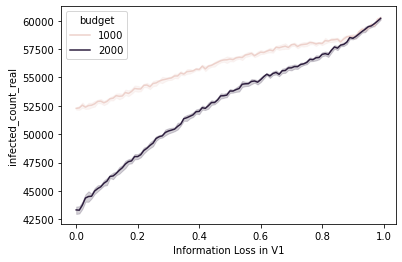

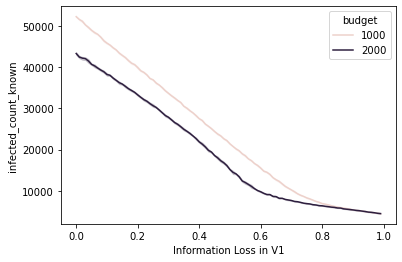

In [2]:
df = pd.read_csv("../output/run_WaEzV/results.csv")

#sns.lineplot(data=df, x='discovery_rate',y='infected_count_real',hue='budget')
#plt.show()

df['discovery_rate'] = 1-df['discovery_rate']

sns.lineplot(data=df, x='discovery_rate',y='infected_count_real',hue='budget')
plt.xlabel("Information Loss in V1")
plt.show()

sns.lineplot(data=df, x='discovery_rate',y='infected_count_known',hue='budget')
plt.xlabel("Information Loss in V1")
plt.show()


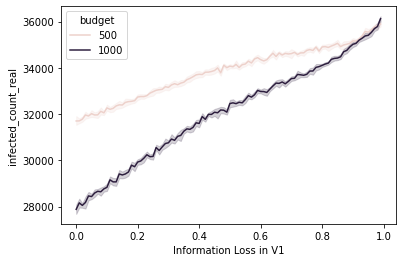

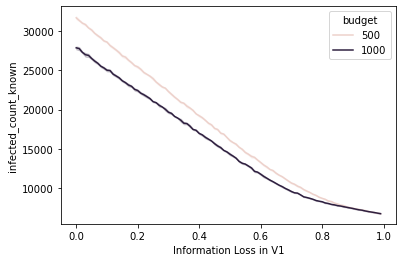

In [2]:
df = pd.read_csv("../output/run_ebLwB/results.csv")

#sns.lineplot(data=df, x='discovery_rate',y='infected_count_real',hue='budget')
#plt.show()

df['discovery_rate'] = 1-df['discovery_rate']

sns.lineplot(data=df, x='discovery_rate',y='infected_count_real',hue='budget')
plt.xlabel("Information Loss in V1")
plt.show()

sns.lineplot(data=df, x='discovery_rate',y='infected_count_known',hue='budget')
plt.xlabel("Information Loss in V1")
plt.show()


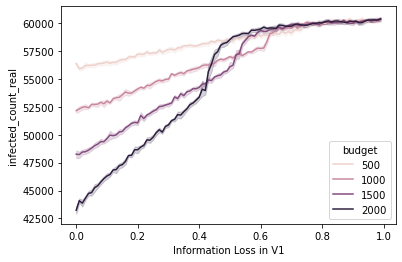

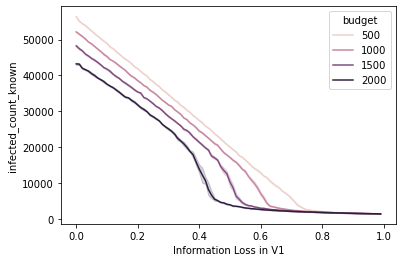

In [2]:
df = pd.read_csv("../output/run_2m6eT/results.csv")

#sns.lineplot(data=df, x='discovery_rate',y='infected_count_real',hue='budget')
#plt.show()

df['discovery_rate'] = 1-df['discovery_rate']

sns.lineplot(data=df, x='discovery_rate',y='infected_count_real',hue='budget')
plt.xlabel("Information Loss in V1")
plt.show()

sns.lineplot(data=df, x='discovery_rate',y='infected_count_known',hue='budget')
plt.xlabel("Information Loss in V1")
plt.show()


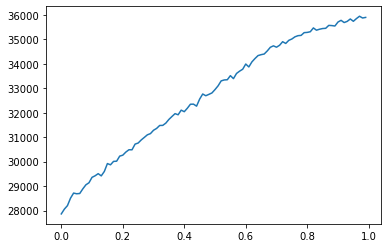

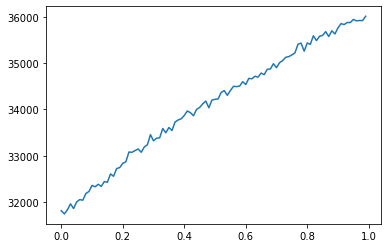

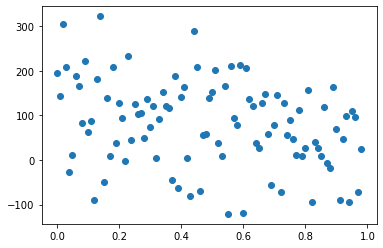

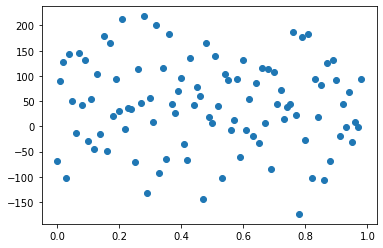

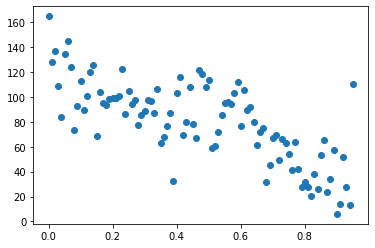

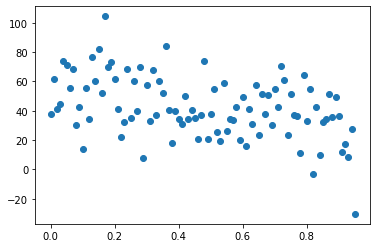

In [68]:
x = list(df['discovery_rate'].unique())
x.sort()
y1 = [0 for _ in range(100)]
y2 = [0 for _ in range(100)]

for i,row in df.iterrows():
    ind = row['discovery_rate']
    val = row['infected_count_real']
    which = row['budget'] 
    
    if which==1000:
        y1[round(100*ind)] += val/10
    else:
        y2[round(100*ind)] += val/10

sns.lineplot(x=x,y=y1)
plt.show()
sns.lineplot(x=x, y=y2)
plt.show()
        
for i in range(99):
    y1[i] = y1[i+1]-y1[i]
    y2[i] = y2[i+1]-y2[i]
    
plt.scatter(x=x[:-1],y=y1[:-1])
plt.show()
plt.scatter(x=x[:-1],y=y2[:-1])
plt.show()

for i in range(95):
    y1[i] = sum(y1[i:i+5])/5
    y2[i] = sum(y2[i:i+5])/5

plt.scatter(x=x[:-4],y=y1[:-4])
plt.show()
plt.scatter(x=x[:-4],y=y2[:-4])
plt.show()

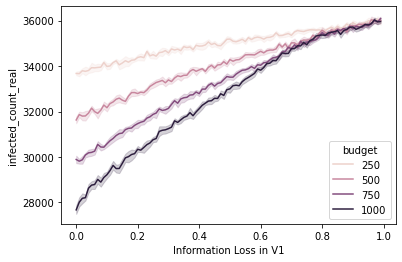

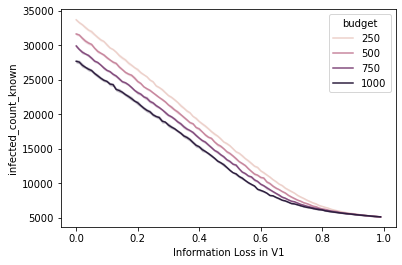

In [70]:
df = pd.read_csv("../output/run_TeQ79/results.csv")

#run_cTM6K
df['discovery_rate'] = 1-df['discovery_rate']

sns.lineplot(data=df, x='discovery_rate',y='infected_count_real',hue='budget')
plt.xlabel("Information Loss in V1")
plt.show()

sns.lineplot(data=df, x='discovery_rate',y='infected_count_known',hue='budget')
plt.xlabel("Information Loss in V1")
plt.show()

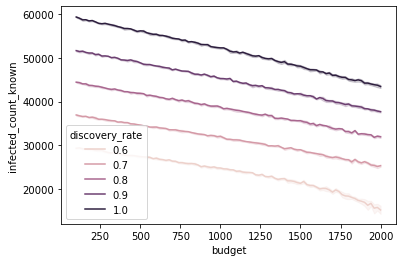

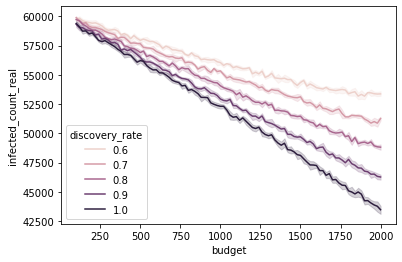

In [4]:
df = pd.read_csv("../output/run_VwQLF/results.csv")

sns.lineplot(data=df, x='budget',y='infected_count_known',hue='discovery_rate')
plt.show()
sns.lineplot(data=df, x='budget',y='infected_count_real',hue='discovery_rate')
plt.show()


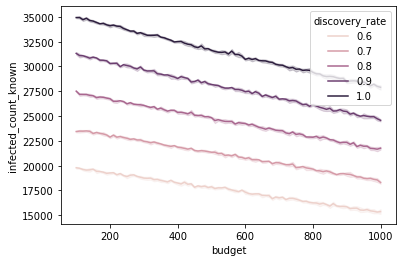

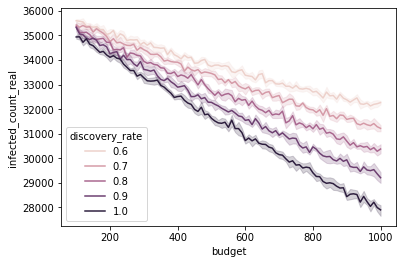

In [5]:
df = pd.read_csv("../output/run_PyzqQ/results.csv")

sns.lineplot(data=df, x='budget',y='infected_count_known',hue='discovery_rate')
plt.show()
sns.lineplot(data=df, x='budget',y='infected_count_real',hue='discovery_rate')
plt.show()

In [7]:
scale = 2.1

In [10]:
n_max = int(zipf.ppf(0.99999,scale))
f = [zipf.pmf(i,a=scale) for i in range(1,n_max)]
f = [0] + f

In [11]:
n_max

21488

In [12]:
F = [0 for i in range(len(f))]
for i in range(1, len(f)):
    F[i] = F[i-1] + f[i]

In [13]:
def kth_order_mass(n, k, x):
    p1 = F[x-1]
    p2 = f[x]
    p3 = 1- F[x]
    
    return sum([comb(n,j) * (pow(p3,j)*pow(p1+p2,n-j) -  pow(p2+p3,j)*pow(p1,n-j)) for j in range(0,n-k+1)])

In [46]:
def expected_kth_order(n, k):
    return sum([x*kth_order_mass(n,k,x) for x in range(1,n_max)])

In [15]:
def decrease_in_infections(size_V1, budget):
    return sum()

In [52]:
decrease = []

for k in range(1001):
    decrease.append(expected_kth_order(1000, k))
    print(k)

x = [i for i in range(100,501,30)]
y=[]
for i in x:
    y.append(decrease[1000]-decrease[i])

plt.plot(x,y)
plt.show()

KeyboardInterrupt: 

In [116]:
n=1000
B=100
y=[]
for i in range(n-B+1,n+1):
    a = zipf.ppf(i/n, 1.1)
    y.append(a)
    print(i)

KeyboardInterrupt: 

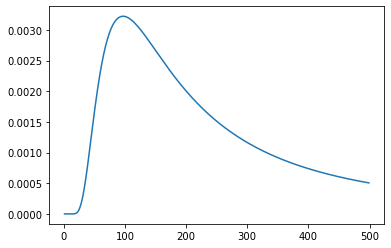

In [41]:
x=[i for i in range(1,500)]
y = [kth_order_mass(500, 500, i) for i in x]

plt.plot(x,y)
plt.show()

<AxesSubplot:xlabel='budget', ylabel='infected_count_real'>

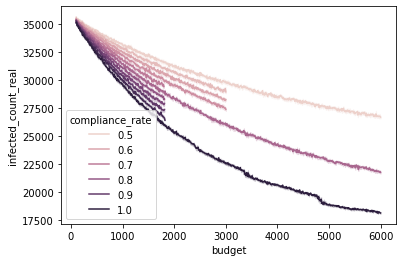

In [118]:
df = pd.read_csv("../output/run_HHunU/results.csv")

sns.lineplot(data=df,x='budget',y='infected_count_real',hue='compliance_rate')

In [150]:
# -log(x!) + xlog(n)
n=10000

x=[i for i in range(2,2000)]
y = [-math.lgamma(i+1) + i*math.log(n) for i in x]


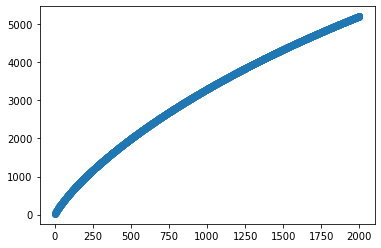

In [151]:
plt.scatter(x,y)

In [47]:
G2 = nx.Graph()
G2.NAME = "cville"
nodes = {}
rev_nodes = []

file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
file.readline()
lines = file.readlines()
c = 0
c_node=0
ma = 0
mi = 100000000

for line in lines:

    a = line.split()
    u = int(a[1])
    v = int(a[2])

    if u in nodes.keys():
        u = nodes[u]
    else:
        nodes[u] = c_node
        rev_nodes.append(u)
        u = c_node
        c_node+=1        
    
    if v in nodes.keys():
        v = nodes[v]
    else:
        nodes[v] = c_node
        rev_nodes.append(v)
        v = c_node
        c_node+=1

    G2.add_edge(u,v)

In [26]:
G1 = load_graph("montgomery")
G2 = nx.generators.trees.random_tree(len(G1.nodes))

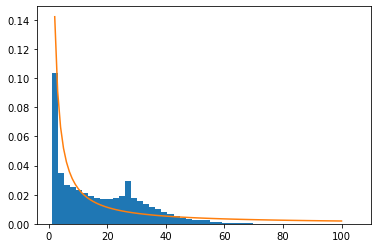

In [45]:
x=[i for i in range(2,101)]
y=[(1/(pow(i,1.1))) for i in x]
const = np.array([y]).sum()
y = [i/const for i in y]
mu=4
plt.hist(dict(G1.degree).values(),bins=50, density=True)
sns.lineplot(x=x, y=y, ms=8)
plt.plot()
plt.show()

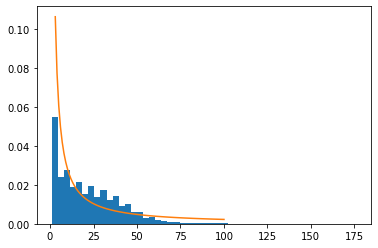

In [57]:
x=[i for i in range(3,101)]
y=[(1/(pow(i,1.1))) for i in x]
const = np.array([y]).sum()
y = [i/const for i in y]
mu=4
plt.hist(dict(G2.degree).values(),bins=50, density=True)
sns.lineplot(x=x, y=y, ms=8)
plt.plot()
plt.show()

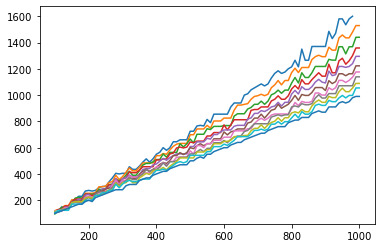

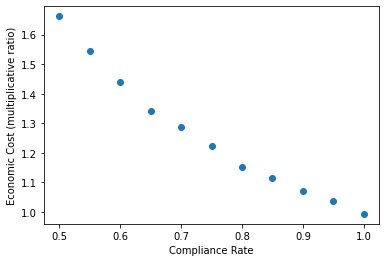

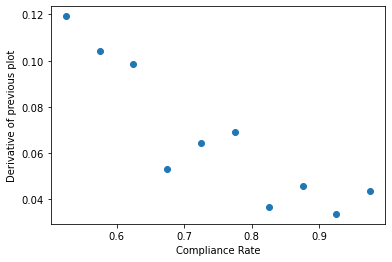

In [7]:
#montgomery, t7.json
economic_plot("run_B9PKb")

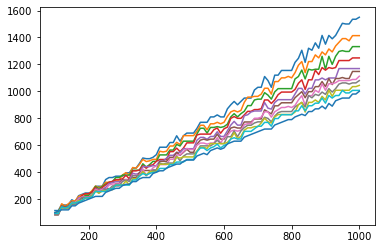

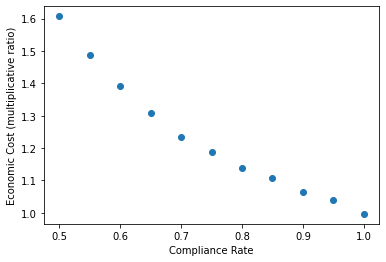

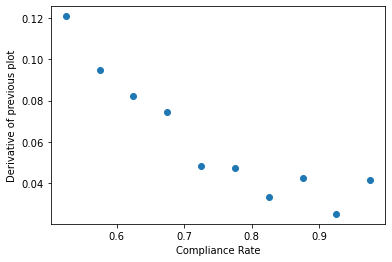

In [8]:
#montgomery, t8.json
economic_plot("run_HHunU")

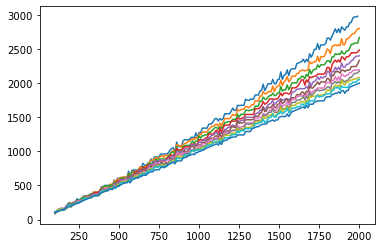

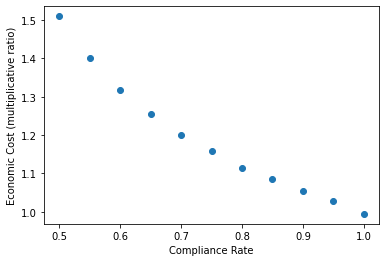

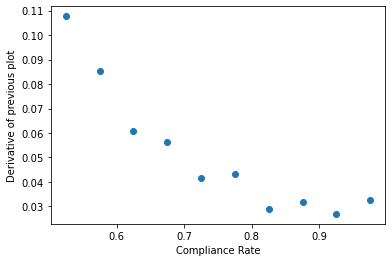

In [5]:
#charlottesville, a5.json
economic_plot("run_HqNSh","run_U3rpZ", 2001)

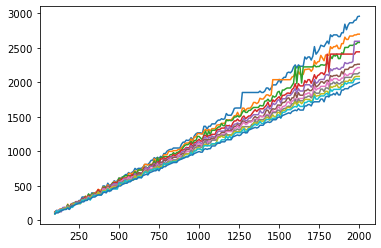

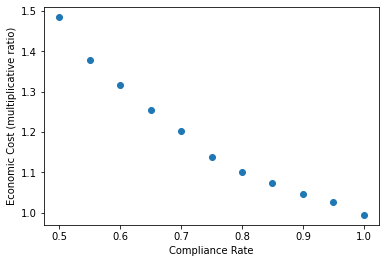

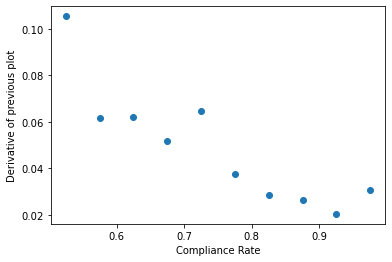

In [4]:
#charlottesville, a6.json
economic_plot("run_hArmg", "run_dS7uR", 2001)

In [3]:
def economic_plot(folder: str, folder2:str, maximum:int = 1001):
    df = pd.read_csv("../output/" + folder + "/results.csv")
    df1 = pd.read_csv("../output/" + folder2 + "/results.csv")
    df=pd.concat([df,df1])
    df = df.sort_values(by='compliance_rate')
    
    
    economic_p(df, maximum)
    
def economic_p(df, maximum:int):
    df1 = df[df.compliance_rate==1]
    x=[]
    y=[[] for _ in df.compliance_rate.unique()]
    df_arr = [df[df.compliance_rate==i].reset_index(drop=True) for i in df.compliance_rate.unique()]

    for B in range(100,maximum,10):

        val = df1[df1.budget==B]['infected_count_real'].mean()
        x.append(B)

        for i,rate in enumerate(df.compliance_rate.unique()):

            budgets = df_arr[i].budget.unique()
            budgets.sort()

            for b in budgets:

                if df_arr[i][df_arr[i].budget==b]['infected_count_real'].mean() <= val:
                    y[i].append(b*rate)
                    break
                    
    m=[]
    n=[]

    for i,yi in enumerate(y):    
        a,b = np.polyfit(x=x[:len(yi)],y=yi,deg=1)
        m.append(df.compliance_rate.unique()[i])
        n.append(a)
        sns.lineplot(x=x[:len(yi)],y=yi)
    plt.show()
    
    plt.scatter(x=m,y=n)    
    plt.xlabel("Compliance Rate")
    plt.ylabel("Economic Cost (multiplicative ratio)")
    plt.show()
    
    n_prime=[]
    m_prime=[]

    for (i,v) in enumerate(n):
        if(i!=0):
            n_prime.append(n[i-1]-n[i])
            m_prime.append(.5*m[i]+.5*m[i-1])
            
    plt.scatter(x=m_prime,y=n_prime)    
    plt.xlabel("Compliance Rate")
    plt.ylabel("Derivative of previous plot")
    plt.show()

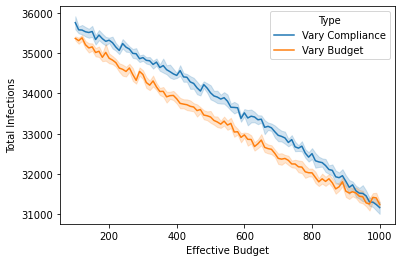

In [17]:
df = pd.read_csv("../output/run_bh8Gt/results.csv")
df1 = pd.read_csv("../output/run_5GQVw/results.csv")
df['Type'] = 'Vary Compliance'
df1['Type'] = 'Vary Budget'

df = pd.concat([df,df1])

df['effective_budget'] = df['compliance_rate'] * df['budget']

sns.lineplot(data=df, x='effective_budget',y='infected_count_known',hue='Type')
plt.ylabel("Total Infections")
plt.xlabel("Effective Budget")
plt.show()

In [3]:
G = load_graph("montgomery")

In [4]:
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)
    

In [ ]:
#this is how the code is used
for i in [10,100,1000,2000,5000,10000]:
    a = time.time()
    state = SimulationState(G, (S,I,R), (S,I,R), 1000, .078,1,1,1,1)
    agent = SAA_Diffusion

    while len(state.SIR_known.SIR[1]) != 0:
        #print(len(state.SIR_known.SIR[1]))
        to_quarantine = agent(state,num_samples=i)
        state.step(to_quarantine)

        #print(state.SIR_known.V1 == state.SIR_real.V1)
        #print("S :" + str(len(state.SIR_known.SIR.S)) + " " + str(len(state.SIR_real.SIR.S)))
        #print("I :" + str(len(state.SIR_known.SIR.I)) + " " + str(len(state.SIR_real.SIR.I)))
        #print("R :" + str(len(state.SIR_known.SIR.R)) + " " + str(len(state.SIR_real.SIR.R)))

        #print()

        #print(len(set(state.SIR_known.SIR.R).difference(set(state.SIR_real.SIR.R))))
        #print(len(set(state.SIR_real.SIR.R).difference(set(state.SIR_known.SIR.R))))
    print(time.time()-a)
    #print(len(state.SIR_known.SIR[1]))
    #print()
    print(len(state.SIR_known.SIR[2])/75457)
    #print(len(state.SIR_known.SIR[0]),len(state.SIR_real.SIR[0]))

In [2]:
print([i/100 for i in range(50,101,5)])

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


In [ ]:
problem = MinExposedSAADiffusion(state.SIR_known)

In [28]:
len(state.SIR_real.SIR[0] + state.SIR_real.SIR[1] + state.SIR_real.SIR[2])

75457

In [179]:
agents = [NoIntervention, Random, Degree, DepRound, DegGreedy]

In [180]:
for agent in agents:
    state = SimulationState(G, (S,I,R), (S,I,R), 2000, .078,1,1, 1,1)

    while len(state.SIR_known.SIR[1]) != 0:
        to_quarantine = agent(state)
        state.step(to_quarantine)

    print(agent.__name__ + " " + str(len(state.SIR_known.SIR[2])))


NoIntervention 36169
Random 30674
Degree 24299
DegGreedy 21525
DepRound 23785
